NAMA        : REZA PUTRI ANGGA
NPM         : 22083010006
MATA KULIAH : DATA MINING (B)

Dengan menggunakan dataset "Walmart Sales Dataset Of 45 Stores" yang merupakan sebuah perusahaan ritel multinasional di Amerika.

Dalam dataset ini, terdapat record pencatatan mengenai di 45 store Walmart dengan periode pencatatan mulai tahun 2010 sampai dengan 2012. 

Terdapat beberapa kolom dalam dataset ini, meliputi store, date, weekly_sales, holiday_flag, temperature, fuel price, cpi, dan unemployment.

Namun, pada analisis penerapan tugas ini dilakukan analisis di 1 store Walmart pada tahun 2010-2012. Hal ini dikarenakan, hanya ingin berfokus pada 1 toko untuk mengetahui bagaimana statistika deskriptif pada toko tersebut dan bagaimana trend penjualannya. Dengan melakukan pengambilan kolom, meliputi store, date, weekly_sales, holiday_flag, dan temperature.

# PRE-PROCESSING DATA

1. Melakukan Load Dataset

In [1]:
import pandas as pd

data = pd.read_csv("walmart-sales-dataset-of-45stores.csv")
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


2. Melakukan Rename Nama Kolom Dan Sorting Tanggal Periode Pencatatan Awal Hingga Akhir

In [2]:
#merename kolom agar lebih mudah dipahami
data.rename(columns={"Store": "Toko", "Date": "Tanggal Periode", "Weekly_Sales": "Penjualan Mingguan",
                     "Holiday_Flag": "Hari Libur", "Temperature": "Suhu", "Fuel_Price": "Harga Bahan Bakar",
                     "CPI": "CPI", "Unemployment": "Tingkat Pengangguran Toko"}, inplace=True)

#mengubah format kolom 'Tanggal Periode' menjadi tipe datetime dan mengurutkannya
data["Tanggal Periode"] = pd.to_datetime(data["Tanggal Periode"], format="%d-%m-%Y")
data["Toko"] = pd.to_numeric(data["Toko"], errors="coerce")
data.sort_values(by=["Tanggal Periode", "Toko"], inplace=True, ignore_index=True)

data

,Toko,Tanggal Periode,Penjualan Mingguan,Hari Libur,Suhu,Harga Bahan Bakar,CPI,Tingkat Pengangguran Toko
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,2,2010-02-05,2136989.46,0,40.19,2.572,210.752605,8.324
2,3,2010-02-05,461622.22,0,45.71,2.572,214.424881,7.368
3,4,2010-02-05,2135143.87,0,43.76,2.598,126.442065,8.623
4,5,2010-02-05,317173.10,0,39.70,2.572,211.653972,6.566
...,...,...,...,...,...,...,...,...
6430,41,2012-10-26,1316542.59,0,41.80,3.686,199.219532,6.195
6431,42,2012-10-26,514756.08,0,70.50,4.301,131.193097,6.943
6432,43,2012-10-26,587603.55,0,69.17,3.506,214.741539,8.839
6433,44,2012-10-26,361067.07,0,46.97,3.755,131.193097,5.217


3. Melakukan Pemilihan Pengambilan Data Yang Akan Di Analisis Lebih Lanjut

In [3]:
import numpy as np

#filter toko 1 untuk analisis lebih lanjut
toko_terpilih = [1]
data_new = data[data["Toko"].isin(toko_terpilih)]

#filter kolom yang ingin dianalisis
kolom_terpilih = ["Tanggal Periode", "Toko", "Penjualan Mingguan", "Hari Libur", "Suhu"]
data_new = data_new[kolom_terpilih]

data_new

,Tanggal Periode,Toko,Penjualan Mingguan,Hari Libur,Suhu
0,2010-02-05,1,1643690.90,0,42.31
45,2010-02-12,1,1641957.44,1,38.51
90,2010-02-19,1,1611968.17,0,39.93
135,2010-02-26,1,1409727.59,0,46.63
180,2010-03-05,1,1554806.68,0,46.50
...,...,...,...,...,...
6210,2012-09-28,1,1437059.26,0,76.08
6255,2012-10-05,1,1670785.97,0,68.55
6300,2012-10-12,1,1573072.81,0,62.99
6345,2012-10-19,1,1508068.77,0,67.97


In [4]:
#mengecek nilai yang hilang
missing_values = data_new.isnull().sum()
print("Jumlah Missing Value Setiap Kolom : ")
(missing_values)

Jumlah Missing Value Setiap Kolom : 


Tanggal Periode       0
Toko                  0
Penjualan Mingguan    0
Hari Libur            0
Suhu                  0
dtype: int64

In [5]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143 entries, 0 to 6390
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Tanggal Periode     143 non-null    datetime64[ns]
 1   Toko                143 non-null    int64         
 2   Penjualan Mingguan  143 non-null    float64       
 3   Hari Libur          143 non-null    int64         
 4   Suhu                143 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 6.7 KB


# ANALISIS DESKRIPTIF UNTUK MEMPEROLEH KARAKTERISTIK DARI DATA 

1. Perhitungan Statistik Deskriptif 

In [6]:
#melakukan perhitungan mean, median, modus, standar deviasi, kuartil, minimum, maksimum
#disemua kolom, kecuali "Tanggal Periode" karena format datetime ditahun 2010 dan 2011 dan Store karena hanya 1 

import numpy as np

#define function untuk perhitungan menggunakan library numpy
def print_stats(label, data):
    print(label)
    
    #perhitungan
    mean = np.mean(data)
    median = np.median(data)
    counts = np.bincount(data.astype(int))
    mode = np.argmax(counts)
    std = np.std(data)
    kuartil = np.percentile(data, [25, 50, 75])
    maksimum = np.max(data)
    minimum = np.min(data)
    
    #penampilan hasil
    print("Mean (Rata-Rata): ", mean)
    print("Median (Nilai Tengah) : ", median)
    print("Modus (Nilai Sering Muncul) : ", mode)
    print("Standar Deviasi: ", std)
    print("Kuartil : ", kuartil)
    print("Maksimum : ", maksimum)
    print("Minimum : ", minimum)
    print()

#penampilan ouput tiap kolom
print("'Statistik Dasar Di Masing-Masing Kolom Pada Tahun 2010-2012'")
columns = ["Penjualan Mingguan", "Hari Libur", "Suhu"]
for column in columns:
    print_stats(f"Statistik Deskriptif Untuk Kolom '{column}' : ", data_new[column].values)

'Statistik Dasar Di Masing-Masing Kolom Pada Tahun 2010-2012'
Statistik Deskriptif Untuk Kolom 'Penjualan Mingguan' : 
Mean (Rata-Rata):  1555264.3975524476
Median (Nilai Tengah) :  1534849.64
Modus (Nilai Sering Muncul) :  1316899
Standar Deviasi:  155434.42363856622
Kuartil :  [1458104.69 1534849.64 1614892.03]
Maksimum :  2387950.2
Minimum :  1316899.31

Statistik Deskriptif Untuk Kolom 'Hari Libur' : 
Mean (Rata-Rata):  0.06993006993006994
Median (Nilai Tengah) :  0.0
Modus (Nilai Sering Muncul) :  0
Standar Deviasi:  0.2550291262770695
Kuartil :  [0. 0. 0.]
Maksimum :  1
Minimum :  0

Statistik Deskriptif Untuk Kolom 'Suhu' : 
Mean (Rata-Rata):  68.30678321678322
Median (Nilai Tengah) :  69.64
Modus (Nilai Sering Muncul) :  80
Standar Deviasi:  14.200572115008763
Kuartil :  [58.265 69.64  80.485]
Maksimum :  91.65
Minimum :  35.4



In [7]:
#melakukan perhitungan mean, median, modus, standar deviasi, kuartil, minimum, maksimum
#disemua kolom, kecuali "Tanggal Periode" karena format datetime di masing-masing tahun dan Store karena hanya 1

import numpy as np

#define function untuk perhitungan menggunakan library numpy
def print_stats(label, data):
    print(label)
    
    #perhitungan
    mean = np.mean(data)
    median = np.median(data)
    mode = np.argmax(np.bincount(data.astype(int)))
    std = np.std(data)
    kuartil = np.percentile(data, [25, 50, 75])
    maksimum = np.max(data)
    minimum = np.min(data)
    
    #penampilan hasil
    print("Mean (Rata-Rata): ", mean)
    print("Median (Nilai Tengah) : ", median)
    print("Modus (Nilai Sering Muncul) : ", mode)
    print("Standar Deviasi: ", std)
    print("Kuartil : ", kuartil)
    print("Maksimum : ", maksimum)
    print("Minimum : ", minimum)
    print()

#melakukan perhitungan statistik untuk tahun tertentu
def calculate_statistics(data, year):
    print(f"'Statistik Dasar Di Masing-Masing Kolom Pada Tahun {year}'")
    for column in ["Penjualan Mingguan", "Hari Libur", "Suhu"]:
        print_stats(f"Statistik Deskriptif Untuk Kolom '{column}' : ", data[column].values)

#filter data untuk setiap tahun 2010-2012 dan hitung statistiknya
for year in range(2010, 2013):
    data_year = data_new[data_new["Tanggal Periode"].dt.year == year]
    calculate_statistics(data_year, year)

'Statistik Dasar Di Masing-Masing Kolom Pada Tahun 2010'
Statistik Deskriptif Untuk Kolom 'Penjualan Mingguan' : 
Mean (Rata-Rata):  1526642.3333333333
Median (Nilai Tengah) :  1494365.495
Modus (Nilai Sering Muncul) :  1345454
Standar Deviasi:  173414.20379141424
Kuartil :  [1429059.18  1494365.495 1552446.13 ]
Maksimum :  2387950.2
Minimum :  1345454.0

Statistik Deskriptif Untuk Kolom 'Hari Libur' : 
Mean (Rata-Rata):  0.08333333333333333
Median (Nilai Tengah) :  0.0
Modus (Nilai Sering Muncul) :  0
Standar Deviasi:  0.2763853991962833
Kuartil :  [0. 0. 0.]
Maksimum :  1
Minimum :  0

Statistik Deskriptif Untuk Kolom 'Suhu' : 
Mean (Rata-Rata):  67.4975
Median (Nilai Tengah) :  68.525
Modus (Nilai Sering Muncul) :  80
Standar Deviasi:  14.602948261110381
Kuartil :  [54.0175 68.525  80.9175]
Maksimum :  87.16
Minimum :  38.51

'Statistik Dasar Di Masing-Masing Kolom Pada Tahun 2011'
Statistik Deskriptif Untuk Kolom 'Penjualan Mingguan' : 
Mean (Rata-Rata):  1556190.7467307688
Median 

In [8]:
#perhitungan menggunakan describe

data_describe = data_new.describe()
data_describe

,Tanggal Periode,Toko,Penjualan Mingguan,Hari Libur,Suhu
count,143,143.0,1.430000e+02,143.000000,143.000000
mean,2011-06-17 00:00:00,1.0,1.555264e+06,0.069930,68.306783
min,2010-02-05 00:00:00,1.0,1.316899e+06,0.000000,35.400000
25%,2010-10-11 12:00:00,1.0,1.458105e+06,0.000000,58.265000
50%,2011-06-17 00:00:00,1.0,1.534850e+06,0.000000,69.640000
75%,2012-02-20 12:00:00,1.0,1.614892e+06,0.000000,80.485000
max,2012-10-26 00:00:00,1.0,2.387950e+06,1.000000,91.650000
std,NaN,0.0,1.559808e+05,0.255926,14.250486


2. Pengecekan Data Terdistribusi Dengan Nilai Rata-Rata Menggunakan Skewness Dan Pengecekan Data Mengandung Banyak Nilai Ekstrem Atau Tidak Menggunakan Kurtosis

In [9]:
#perhitungan dan visualisasi skewness dan kurtosis
#untuk mengecek apakah data terdistribusi dengan nilai rata-rata dan apakah data mengandung banyak nilai ekstrem

#menghitung skewness dan kurtosis dari nilai yang bisa diperhitungkan
numerical_columns = data_new.select_dtypes(include=["number"]).columns
skewness = data_new[numerical_columns].skew()
kurtosis = data_new[numerical_columns].kurtosis()

print("'Skewness'")
print(skewness)
print("\n'Kurtosis'")
print(kurtosis)

'Skewness'
Toko                  0.000000
Penjualan Mingguan    2.180276
Hari Libur            3.408571
Suhu                 -0.406924
dtype: float64

'Kurtosis'
Toko                  0.000000
Penjualan Mingguan    8.151506
Hari Libur            9.754602
Suhu                 -0.873924
dtype: float64


3. Pengecekan Keterkaitan Antar Variabel (2 Variabel Dan 3 Variabel)

Analisis Korelasi 2 Variabel Dengan Tanggal Periode Terhadap Penjualan Mingguan Dalam Rentang Mingguan, Bulanan, Dan Tahunan

Korelasi Antara Tahun Dan Penjualan Mingguan: 0.21650157846810206
Korelasi Antara Bulan Dan Penjualan Mingguan: 0.215425046303892
Korelasi Antara Minggu Dalam Tahun Dan Penjualan Mingguan: 0.21453921574872156


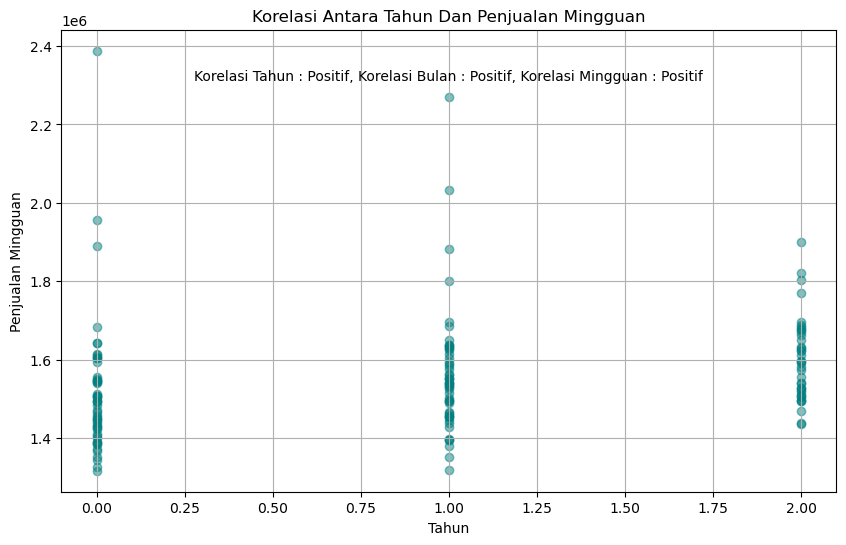

In [10]:
#analisis korelasi tanggal periode dengan penjualan mingguan
import numpy as np
import matplotlib.pyplot as plt

#memecah Tanggal Periode menjadi fitur tambahan
start_date = data_new["Tanggal Periode"].min()
data_new["Year"] = (data_new["Tanggal Periode"] - start_date).dt.days // 365
data_new["Month"] = (data_new["Tanggal Periode"] - start_date).dt.days // 30
data_new["Week"] = (data_new["Tanggal Periode"] - start_date).dt.days // 7

#menghitung korelasi antara fitur tambahan dan penjualan mingguan
correlation_year = data_new["Year"].corr(data_new["Penjualan Mingguan"])
correlation_month = data_new["Month"].corr(data_new["Penjualan Mingguan"])
correlation_week = data_new["Week"].corr(data_new["Penjualan Mingguan"])

#hasil korelasi
print(f"Korelasi Antara Tahun Dan Penjualan Mingguan: {correlation_year}")
print(f"Korelasi Antara Bulan Dan Penjualan Mingguan: {correlation_month}")
print(f"Korelasi Antara Minggu Dalam Tahun Dan Penjualan Mingguan: {correlation_week}")

#hasil perhitungan korelasi
correlation_year_desc = "Positif" if correlation_year > 0 else "Negatif" if correlation_year < 0 else "Tidak Berkorelasi"
correlation_month_desc = "Positif" if correlation_month > 0 else "Negatif" if correlation_month < 0 else "Tidak Berkorelasi"
correlation_week_desc = "Positif" if correlation_week > 0 else "Negatif" if correlation_week < 0 else "Tidak Berkorelasi"

#visualisasi scatter plot dengan garis lurus korelasi
plt.figure(figsize=(10, 6))
plt.scatter(data_new["Year"], data_new["Penjualan Mingguan"], color="teal", alpha=0.5)
plt.title("Korelasi Antara Tahun Dan Penjualan Mingguan")
plt.xlabel("Tahun")
plt.ylabel("Penjualan Mingguan")
plt.text(0.5, 0.9, f"Korelasi Tahun : {correlation_year_desc}, Korelasi Bulan : {correlation_month_desc}, Korelasi Mingguan : {correlation_week_desc}",
         horizontalalignment="center", verticalalignment="center", transform=plt.gca().transAxes)
plt.grid(True)

plt.show()

Analisis Korelasi 3 Variabel Di Setiap Kolom Data

Matriks Korelasi :                      Penjualan Mingguan  Hari Libur      Suhu
Penjualan Mingguan            1.000000    0.194905 -0.222701
Hari Libur                    0.194905    1.000000 -0.200543
Suhu                         -0.222701   -0.200543  1.000000


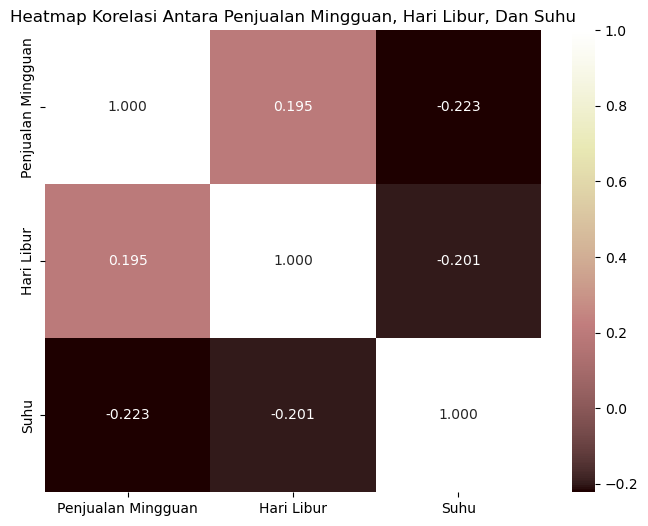

In [11]:
#korelasi penjualan mingguan, hari libur, suhu
#dengan visualisasi heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung matriks korelasi
correlation_matrix = data_new[["Penjualan Mingguan", "Hari Libur", "Suhu"]].corr()
print("Matriks Korelasi : ", correlation_matrix)

#visualisasi heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="pink", fmt=".3f")
plt.title("Heatmap Korelasi Antara Penjualan Mingguan, Hari Libur, Dan Suhu")

plt.show()

In [12]:
#nilai korelasi semua variabel
korelasi_kolom = data_new.corr()

print("Nilai Korelasi Antar Variabel : ")
korelasi_kolom

Nilai Korelasi Antar Variabel : 


,Tanggal Periode,Toko,Penjualan Mingguan,Hari Libur,Suhu,Year,Month,Week
Tanggal Periode,1.000000,NaN,0.214539,-0.013285,0.154069,0.938292,0.999546,1.000000
Toko,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Penjualan Mingguan,0.214539,NaN,1.000000,0.194905,-0.222701,0.216502,0.215425,0.214539
Hari Libur,-0.013285,NaN,0.194905,1.000000,-0.200543,-0.032977,-0.013779,-0.013285
Suhu,0.154069,NaN,-0.222701,-0.200543,1.000000,0.198157,0.153239,0.154069
Year,0.938292,NaN,0.216502,-0.032977,0.198157,1.000000,0.937809,0.938292
Month,0.999546,NaN,0.215425,-0.013779,0.153239,0.937809,1.000000,0.999546
Week,1.000000,NaN,0.214539,-0.013285,0.154069,0.938292,0.999546,1.000000


# ANALISIS VISUAL UNTUK MEMPEROLEH KARAKTERISTIK DARI DATA 

1. Pengecekan Data Berdistribusi Normal Atau Tidak Menggunakan Histogram

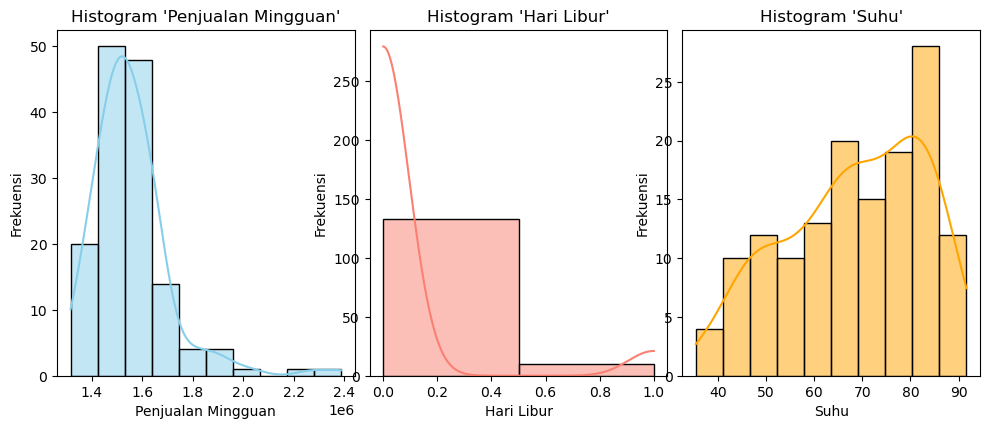

In [29]:
#visualisasi histogram untuk melakukan pengecekan apakah suatu data berdistribusi normal atau tidak
#pada semua kolom kecuali "Tanggal Periode" dan "Toko" karena memiliki tipe datetime dan hanya 1

import matplotlib.pyplot as plt
import seaborn as sns

#plot histogram semua kolom,
plt.figure(figsize=(10, 8))

#penjualan mingguan
plt.subplot(2, 3, 1)
sns.histplot(data_new["Penjualan Mingguan"], bins=10, color="skyblue", kde=True)
plt.title("Histogram 'Penjualan Mingguan'")
plt.xlabel("Penjualan Mingguan")
plt.ylabel("Frekuensi")
plt.tight_layout()

#hari libur
plt.subplot(2, 3, 2)
sns.histplot(data_new["Hari Libur"], bins=2, color="salmon", kde=True)
plt.title("Histogram 'Hari Libur'")
plt.xlabel("Hari Libur")
plt.ylabel("Frekuensi")

#suhu
plt.subplot(2, 3, 3)
sns.histplot(data_new["Suhu"], bins=10, color="orange", kde=True)
plt.title("Histogram 'Suhu'")
plt.xlabel("Suhu")
plt.ylabel("Frekuensi")


plt.show()

In [41]:
#pengecekan apakah berdistribusi normal
from scipy.stats import shapiro

stat_penjualan, p_penjualan = shapiro(data_new["Penjualan Mingguan"])
alpha = 0.05

#untuk penjualan mingguan
print("'Uji Normalitas Untuk Data Penjualan Mingguan'")
print("Statistik Uji :", stat_penjualan)
print("P-Value:", p_penjualan)
if p_penjualan > alpha:
    print("Data Berdistribusi Normal")
else:
    print("Data Tidak Berdistribusi Normal")


#untuk data suhu
stat_suhu, p_suhu = shapiro(data_new["Suhu"])
print("'Uji Normalitas Untuk Data Suhu'")
print("Statistik Uji : ", stat_suhu)
print("p-Value:", p_suhu)
if p_penjualan > alpha:
    print("Data Berdistribusi Normal")
else:
    print("Data Tidak Berdistribusi Normal")

'Uji Normalitas Untuk Data Penjualan Mingguan'
Statistik Uji : 0.8375532627105713
P-Value: 2.795954266721079e-11
Data Tidak Berdistribusi Normal
'Uji Normalitas Untuk Data Suhu'
Statistik Uji :  0.9539842009544373
p-Value: 0.00010702353756641969
Data Tidak Berdistribusi Normal


2. Pengecekan Proporsi Data Hari Libur (Karena Biner) Di Gunakan Pie Chart

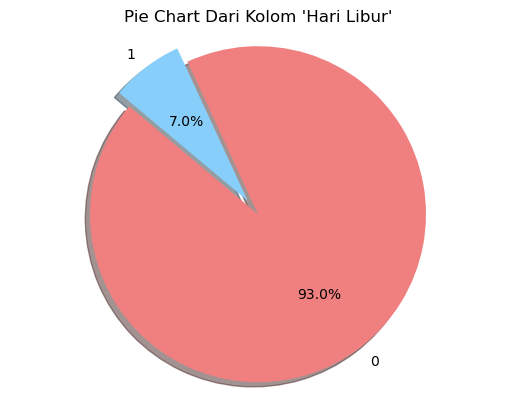

In [42]:
#visualisasi bar chart untuk mengetahui proporsi hari libur yang memiliki nilai biner 0 dan 1
import matplotlib.pyplot as plt

#jumlah nilai 0 dan 1 dalam kolom "Hari Libur"
count_0 = (data_new["Hari Libur"] == 0).sum()
count_1 = (data_new["Hari Libur"] == 1).sum()

#label dan nilai untuk pie chart
labels = ["0", "1"]
sizes = [count_0, count_1]
colors = ["lightcoral", "lightskyblue"]
explode = (0, 0.1)  #menekankan potongan '1'


plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Pie Chart Dari Kolom 'Hari Libur'")
plt.axis("equal")

plt.show()

3. Pengecekan Nilai Letak Kuartil Menggunakan Box Plot

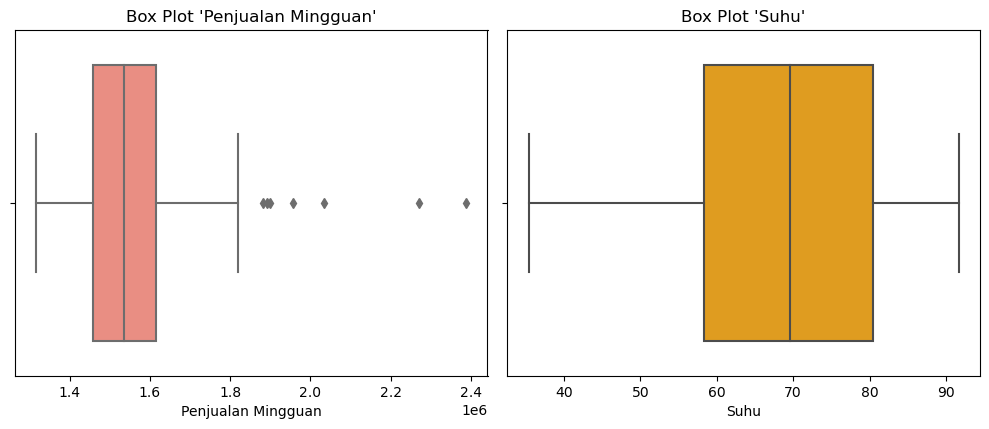

In [31]:
#nilai letak kuartil hanya pada kolom "Penjualan Mingguan" dan "Suhu"
#karena kolom "Tanggal Periode" memiliki tipe data datetime dan "Hari Libur" memiliki tipe data biner (0,1)

import matplotlib.pyplot as plt
import seaborn as sns

#fungsi untuk menghitung batas atas dan batas bawah berdasarkan IQR
def calculate_bounds(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

#tata letak subplot
plt.figure(figsize=(10, 8))

#box plot untuk Penjualan Mingguan
plt.subplot(2, 2, 1)
sns.boxplot(x=data_new["Penjualan Mingguan"], color="salmon")
plt.title("Box Plot 'Penjualan Mingguan'")
plt.xlabel("Penjualan Mingguan")

#box plot untuk Suhu
plt.subplot(2, 2, 2)
sns.boxplot(x=data_new["Suhu"], color="orange")
plt.title("Box Plot 'Suhu'")
plt.xlabel("Suhu")

plt.tight_layout()
plt.show()

4. Visualisasi Tren Penjualan Mingguan, Bulanan, Dan Tahunan

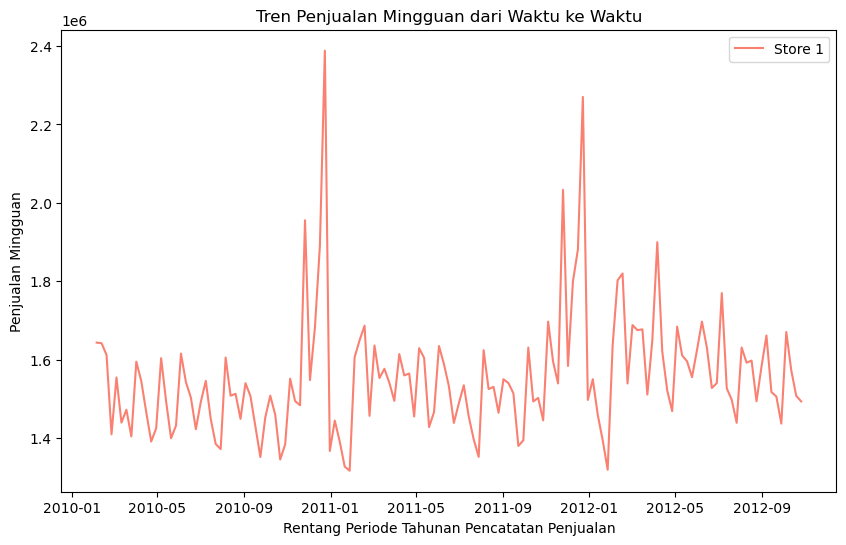

In [32]:
#visualisasi tren penjualan mingguan dari rentang tahun 2010-2012
import matplotlib.pyplot as plt

# tren penjualan
data_new["Tanggal Periode"] = pd.to_datetime(data_new["Tanggal Periode"])
plt.figure(figsize=(10, 6))
toko_data = data_new[data_new["Toko"] == 1] 
plt.plot(toko_data["Tanggal Periode"], toko_data["Penjualan Mingguan"], label="Store 1", color="salmon")
plt.title("Tren Penjualan Mingguan dari Waktu ke Waktu")
plt.xlabel("Rentang Periode Tahunan Pencatatan Penjualan")
plt.ylabel("Penjualan Mingguan")
plt.legend()

plt.show()

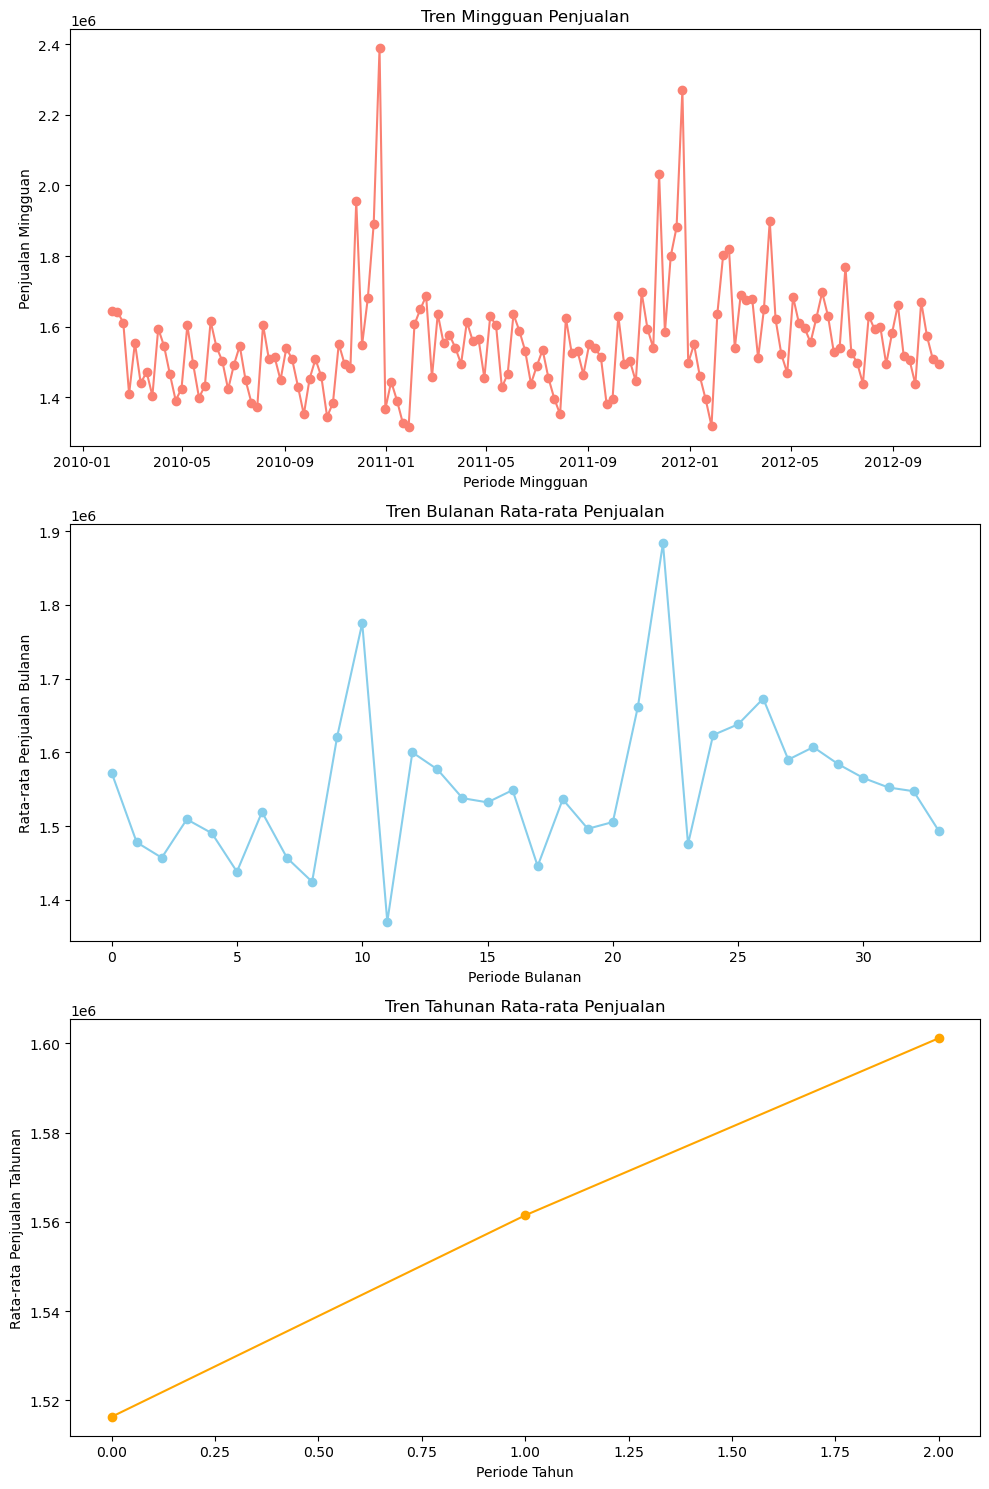

In [34]:
#visualisasi rata-rata tren penjualan mingguan, bulanan, dan tahunan

import matplotlib.pyplot as plt

#membuat figure dan axis
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

#plot tren mingguan
axs[0].plot(data_new["Tanggal Periode"], data_new["Penjualan Mingguan"], color="salmon", marker="o")
axs[0].set_title("Tren Mingguan Penjualan")
axs[0].set_xlabel("Periode Mingguan")
axs[0].set_ylabel("Penjualan Mingguan")

#plot tren bulanan
monthly_sales = data_new.groupby("Month")["Penjualan Mingguan"].mean()
axs[1].plot(monthly_sales.index, monthly_sales.values, color="skyblue", marker="o")
axs[1].set_title("Tren Bulanan Rata-rata Penjualan")
axs[1].set_xlabel("Periode Bulanan")
axs[1].set_ylabel("Rata-rata Penjualan Bulanan")

#plot tren tahunan
yearly_sales = data_new.groupby("Year")["Penjualan Mingguan"].mean()
axs[2].plot(yearly_sales.index, yearly_sales.values, color="orange", marker="o")
axs[2].set_title("Tren Tahunan Rata-rata Penjualan")
axs[2].set_xlabel("Periode Tahun")
axs[2].set_ylabel("Rata-rata Penjualan Tahunan")


plt.tight_layout()
plt.show()

# Interpretasi Analisis Deskriptif Dan Analisis Visual

Berdasarkan analisis data, terdapat beberapa kesimpulan yang signifikan. Statistik deskriptif menunjukkan adanya konsistensi nilai toko di seluruh periode, sementara penjualan mingguan memiliki variasi yang signifikan dengan distribusi mendekati normal namun dengan beberapa outlier. Distribusi data hari libur cenderung miring ke kanan, sementara suhu memiliki distribusi yang lebih simetris. Korelasi antara faktor-faktor seperti tahun, bulan, minggu dalam tahun, hari libur, dan suhu dengan penjualan mingguan menunjukkan hubungan yang lemah. Visualisasi tren menunjukkan pola kenaikan dan penurunan yang berbeda-beda dari waktu ke waktu. Sehingga dapat disimpulkan, bahwa data menunjukkan variasi dan pola yang berbeda-beda, dengan faktor-faktor tertentu memiliki pengaruh yang beragam terhadap hasil penjualan, namun korelasinya cenderung lemah, menunjukkan adanya faktor lain yang memengaruhi hasil penjualan secara signifikan.